# Week 3 Assignment
## Multi Armed Bandits

Let's get into some coding for this. 
Multi-Armed Bandits are fun because you get a bunch of interesting and intuitive algorithms for solving a straightforward task: figure out the distribution of the rewards for the arms and thus be able to compare and figure out the best arm.

### Tasks
- Using `epsilon_greedy` as a reference (complete code is provided), write code in `klucb`, `ucb` and `thompson` so that agents following that algorithm can play the game correctly.
- Each agent is derived from the baseclass in the first code block. Please don't make changes to it

### Some Points on Assignment Structure
- Here we have tried to give you a brief insight into how object oriented programming works. This is very useful and allows for programs to be modular and thus reused and replaced as and when necesssary without hassle.
- This shouldn't pose an issue in the logic building, but in case it does, or you have related doubts, feel free to drop us a text.

In [252]:
# Don't make any changes to this

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image

class MultiArmedBandit:
    def __init__(self, arms : np.ndarray[float]):
        self.arms = arms # list of probabilities of each arm returning a favorable reward
        self.best_arm = np.max(arms) # useful for regret calculation
        self.cumulative_regret_array = [0]

    def pull(self, arm:int) -> int:
        assert arm in np.arange(0, len(self.arms)), "Action undefined for bandit"
        reward = 1 if np.random.random() < self.arms[arm] else 0
        self.cumulative_regret_array.append(self.cumulative_regret_array[-1] + self.best_arm - self.arms[arm])
        return reward
    
    def plot_cumulative_regret(self):
        timesteps = np.arange(1, len(self.cumulative_regret_array) + 1)

        # Plot the data
        plt.figure(figsize=(8,4))
        plt.plot(timesteps, self.cumulative_regret_array, linestyle='-', color='r', label='Cumulative Regret')

        # Formatting
        plt.title('Cumulative Regret Over Time', fontsize=16)
        plt.xlabel('Timesteps', fontsize=14)
        plt.ylabel('Cumulative Regret', fontsize=14)
        plt.grid(True, which='both', linestyle='-', linewidth=0.5)
        plt.yticks(np.arange(0, max(self.cumulative_regret_array) + 5, step=5))

        # Add legend
        plt.legend(loc='upper left', fontsize=12)

        # Tight layout to ensure there's no clipping of labels
        plt.tight_layout()

        # Show plot
        plt.show()



class Agent:
    def __init__(self, time_to_run, bandit : MultiArmedBandit):
        self.time_to_run = time_to_run
        self.rewards = []
        self.bandit = bandit
        self.arms = len(bandit.arms)
    
    def plot_reward_vs_time_curve(self):

        # Create an index for timesteps
        timesteps = np.arange(1, len(self.rewards) + 1)

        # Average out self.rewards
        avg_rewards = [np.mean(self.rewards[0:T+1]) for T in range(self.time_to_run)]

        # Plot the data
        plt.figure(figsize=(8,4))
        plt.plot(timesteps, avg_rewards, linestyle='-', color='g', label='Rewards')

        # Formatting
        plt.title('Average Reward Over Time', fontsize=16)
        plt.xlabel('Timesteps', fontsize=14)
        plt.ylabel('Mean Reward Value upto timestep t', fontsize=14)
        plt.grid(True, which='both', linestyle='-', linewidth=0.5)
        # plt.xticks(timesteps)  # Show all timesteps as x-axis ticks
        # plt.yticks(np.arange(0, max(self.rewards) + 5, step=5))

        # Add legend
        plt.legend(loc='upper left', fontsize=12)

        # Tight layout to ensure there's no clipping of labels
        plt.tight_layout()

        # Show plot
        plt.show()

## Epsilon Greedy Agent

In [208]:
class EpsilonGreedyAgent(Agent):
    epsilon : float
    reward_memory : np.ndarray # A per arm value of how much reward was gathered
    count_memory : np.ndarray # An array of the number of times an arm is pulled 

    def __init__(self, time_horizon, bandit:MultiArmedBandit, epsilon = 0.01):
        super().__init__(time_horizon, bandit)
        self.epsilon = epsilon
        self.bandit : MultiArmedBandit = bandit
        self.reward_memory = np.zeros(len(bandit.arms))
        self.count_memory = np.zeros(len(bandit.arms))
        self.time_step = 0

    def give_pull(self):
        if np.random.random() < self.epsilon: # Choose random action
           random_arm = np.random.choice(len(self.bandit.arms))
           reward =  self.bandit.pull(random_arm)
           self.reinforce(reward, random_arm)
        else: # Choose best known action!
           best_arm = np.argmax(self.reward_memory / self.count_memory)
           reward = self.bandit.pull(best_arm)
           self.reinforce(reward, best_arm)
           

    def reinforce(self, reward, arm):
        self.count_memory[arm] += 1
        self.reward_memory[arm] += reward
        self.time_step += 1
        self.rewards.append(reward)
        # print(self.count_memory, self.reward_memory)
 
    def plot_arm_graph(self):
        counts = self.count_memory
        indices = np.arange(len(counts))

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.bar(indices, counts, color='skyblue', edgecolor='black')

        # Formatting
        plt.title('Counts per Category', fontsize=16)
        plt.xlabel('Arm', fontsize=14)
        plt.ylabel('Pull Count', fontsize=14)
        plt.grid(axis='y', linestyle='-')  # Add grid lines for the y-axis
        plt.xticks(indices, [f'Category {i+1}' for i in indices], rotation=45, ha='right')
        # plt.yticks(np.arange(0, max(counts) + 2, step=2))

        # Annotate the bars with the count values
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12, color='black')

        # Tight layout to ensure there's no clipping of labels
        plt.tight_layout()

        # Show plot
        plt.show()

C:\Users\parth\AppData\Local\Temp\ipykernel_10120\1983779681.py:20: RuntimeWarning: invalid value encountered in divide
  best_arm = np.argmax(self.reward_memory / self.count_memory)


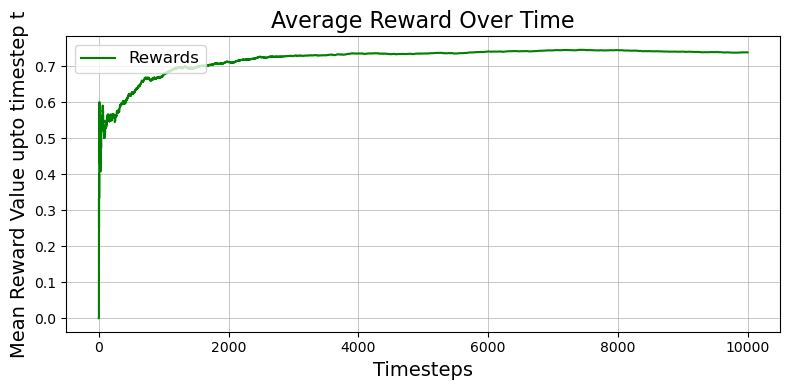

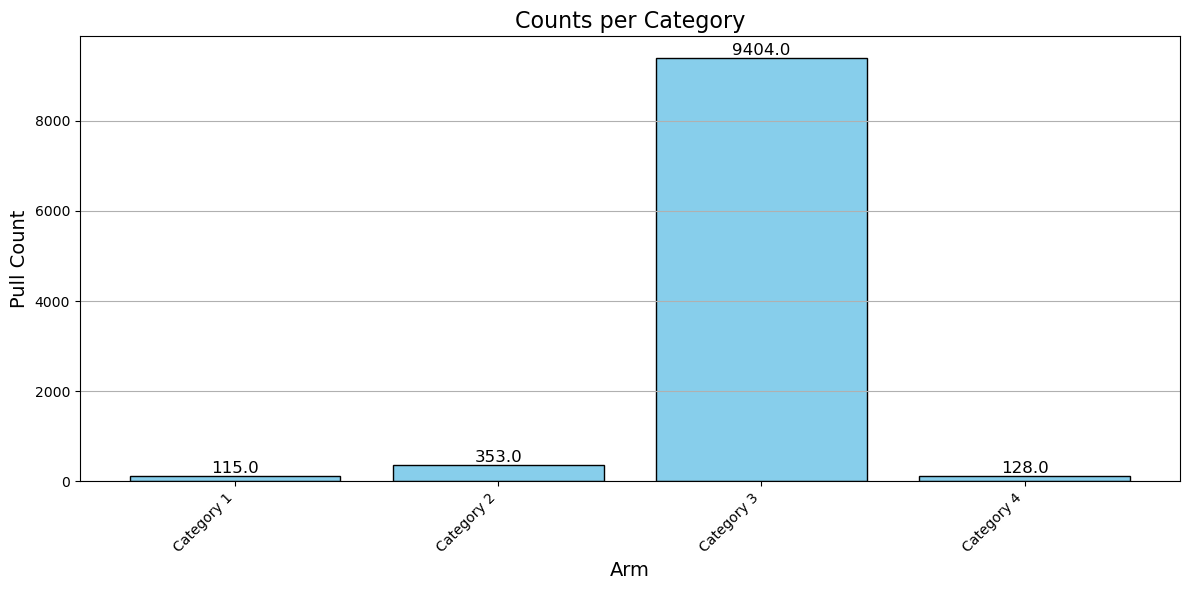

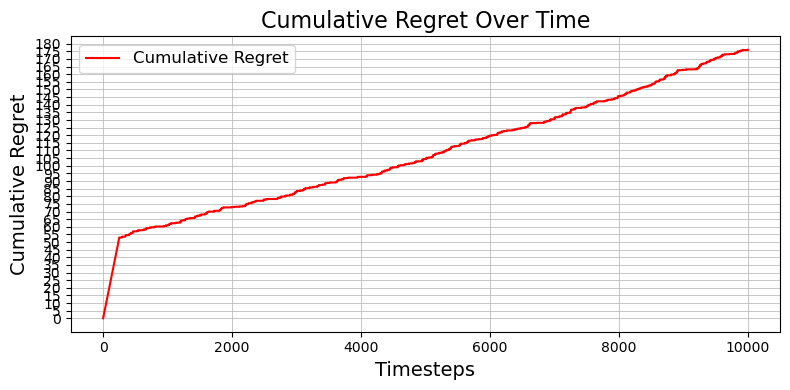

In [209]:
# Code to test
# Init Bandit
TIME_HORIZON = 10_000
bandit = MultiArmedBandit(np.array([0.23,0.55,0.76,0.44]))
agent = EpsilonGreedyAgent(TIME_HORIZON, bandit, 0.05)

# Loop
for i in range(TIME_HORIZON):
    agent.give_pull()

# Plot curves
agent.plot_reward_vs_time_curve()
agent.plot_arm_graph()
bandit.plot_cumulative_regret()

### What's required in `main` ?
Once all agents are ready, let them all try their hands at the same games (each run should result the same reward sequence for every agent playing the game). 

The first set of games, S1, will be vanilla (again 30k time steps). This set just contains the single bandit game given in the main section of any of those files you saw. Run that instance and plot a single curve (one for cumulative regret, one for cumulative reward) for all the 4 agents. Also plot a bar chart of the number of times each agent chose the optimal arm alone.


The next set of games we'll call S2 include a pair of bandits of probability $p$ and $p+0.1$ where $p \in$ \{0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9\}. I.e., in each game, there'll be two bandits, and there'll be 17 such games. For S2, cumulative reward and regret curves are not required to be plotted. What will be required is a plot of the final regret at the end of the games for each value of $p$. This should be easy. The hard part is to explain why the curves you obtained for KL-UCB and UCB look the way they look. Explain the answer to this riddle in a markdown cell at the end.

### Answer to S2

## UCB

In [214]:

class UCBAgent(Agent):
    def __init__(self, time_horizon, bandit: MultiArmedBandit):
        super().__init__(time_horizon, bandit)
        self.count_memory = np.zeros(len(bandit.arms))
        self.reward_memory = np.zeros(len(bandit.arms))
        self.time_step = 1

    def give_pull(self):
        if 0 in self.count_memory:
            arm = np.argmax(self.count_memory == 0)
        else:
            ucb_values = self.reward_memory / self.count_memory + np.sqrt(2 * np.log(self.time_step) / self.count_memory)
            arm = np.argmax(ucb_values)

        reward = self.bandit.pull(arm)
        self.reinforce(reward, arm)

    def reinforce(self, reward, arm):
        self.count_memory[arm] += 1
        self.reward_memory[arm] += reward
        self.time_step += 1
        self.rewards.append(reward)
    def plot_arm_graph(self):
        counts = self.count_memory
        indices = np.arange(len(counts))

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.bar(indices, counts, color='skyblue', edgecolor='black')

        # Formatting
        plt.title('Counts per Category', fontsize=16)
        plt.xlabel('Arm', fontsize=14)
        plt.ylabel('Pull Count', fontsize=14)
        plt.grid(axis='y', linestyle='-')  # Add grid lines for the y-axis
        plt.xticks(indices, [f'Category {i+1}' for i in indices], rotation=45, ha='right')
        # plt.yticks(np.arange(0, max(counts) + 2, step=2))

        # Annotate the bars with the count values
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12, color='black')

        # Tight layout to ensure there's no clipping of labels
        plt.tight_layout()

        # Show plot
        plt.show()

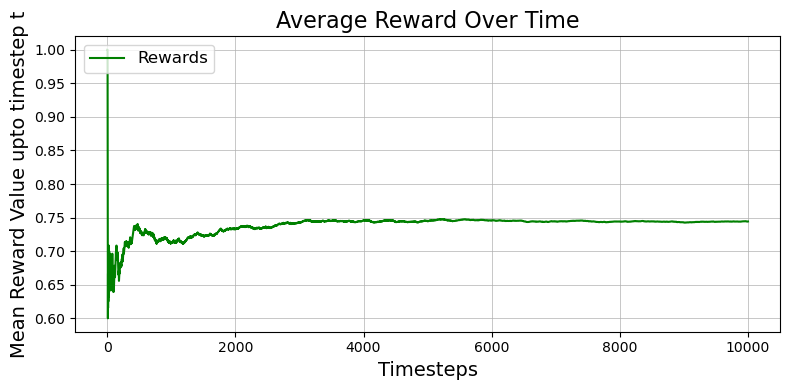

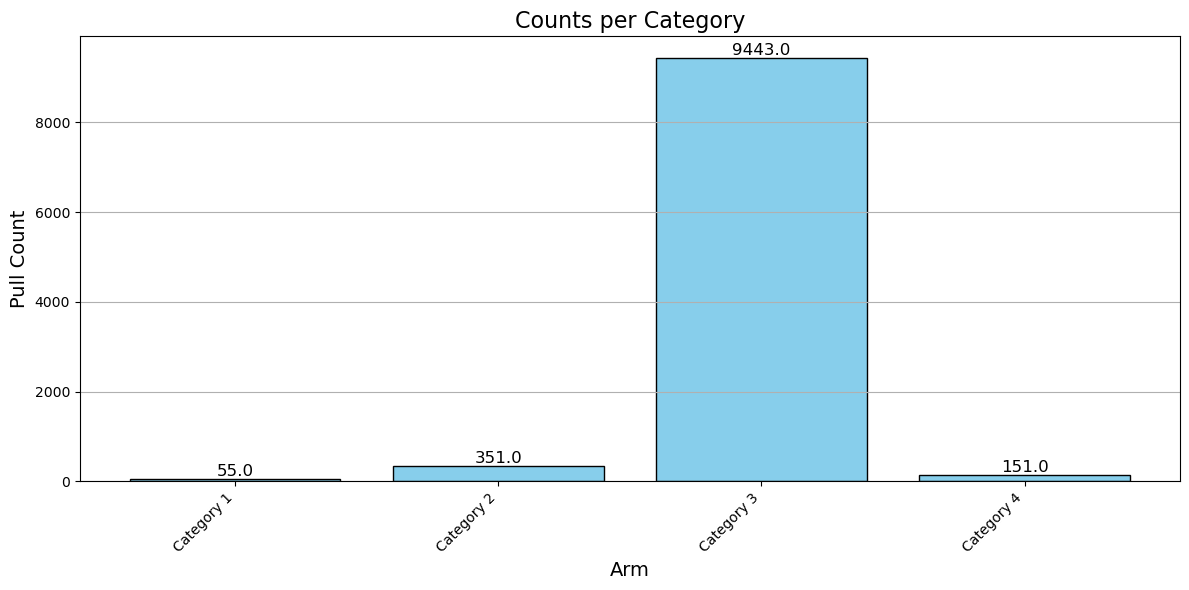

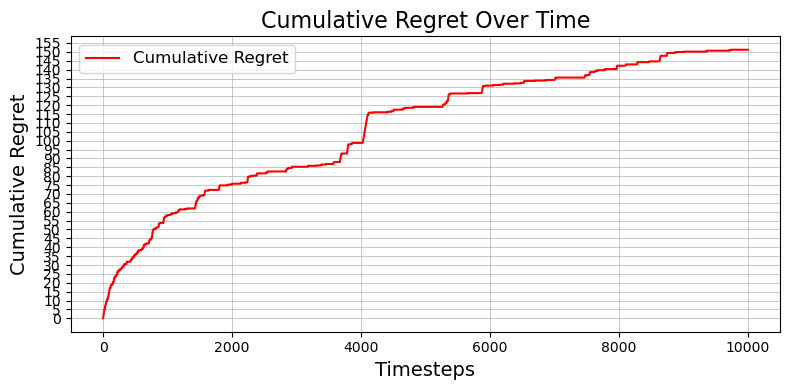

In [215]:
# Code to test
# Init Bandit
TIME_HORIZON = 10_000
bandit = MultiArmedBandit(np.array([0.23,0.55,0.76,0.44]))
agent = UCBAgent(TIME_HORIZON, bandit=bandit)

# Loop
for i in range(TIME_HORIZON):
    agent.give_pull()

# Plot curves
agent.plot_reward_vs_time_curve()
agent.plot_arm_graph()
bandit.plot_cumulative_regret()

## KL-UCB

In [217]:

class KLUCBAgent(Agent):
    def __init__(self, time_horizon, bandit: MultiArmedBandit):
        super().__init__(time_horizon, bandit)
        self.count_memory = np.zeros(len(bandit.arms))
        self.reward_memory = np.zeros(len(bandit.arms))
        self.time_step = 1

    def give_pull(self):
        if 0 in self.count_memory:
            arm = np.argmax(self.count_memory == 0)
        else:
            kl_values = self.reward_memory / self.count_memory + np.sqrt(2 * np.log(self.time_step) / self.count_memory)
            arm = np.argmax(kl_values)

        reward = self.bandit.pull(arm)
        self.reinforce(reward, arm)

    def reinforce(self, reward, arm):
        self.count_memory[arm] += 1
        self.reward_memory[arm] += reward
        self.time_step += 1
        self.rewards.append(reward)
    def plot_arm_graph(self):
        counts = self.count_memory
        indices = np.arange(len(counts))

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.bar(indices, counts, color='skyblue', edgecolor='black')

        # Formatting
        plt.title('Counts per Category', fontsize=16)
        plt.xlabel('Arm', fontsize=14)
        plt.ylabel('Pull Count', fontsize=14)
        plt.grid(axis='y', linestyle='-')  # Add grid lines for the y-axis
        plt.xticks(indices, [f'Category {i+1}' for i in indices], rotation=45, ha='right')
        # plt.yticks(np.arange(0, max(counts) + 2, step=2))

        # Annotate the bars with the count values
        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12, color='black')

        # Tight layout to ensure there's no clipping of labels
        plt.tight_layout()

        # Show plot
        plt.show()
    

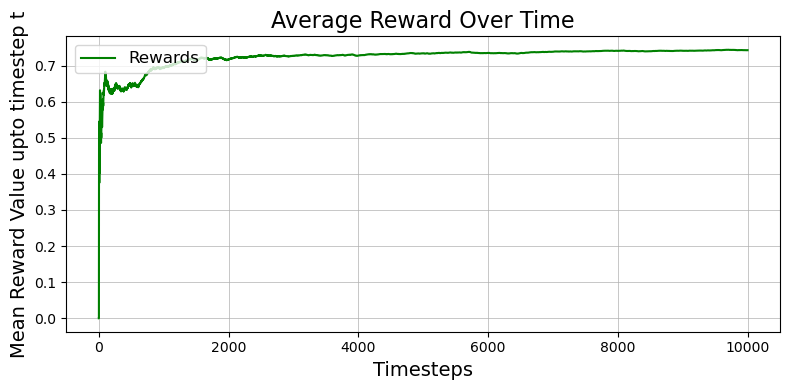

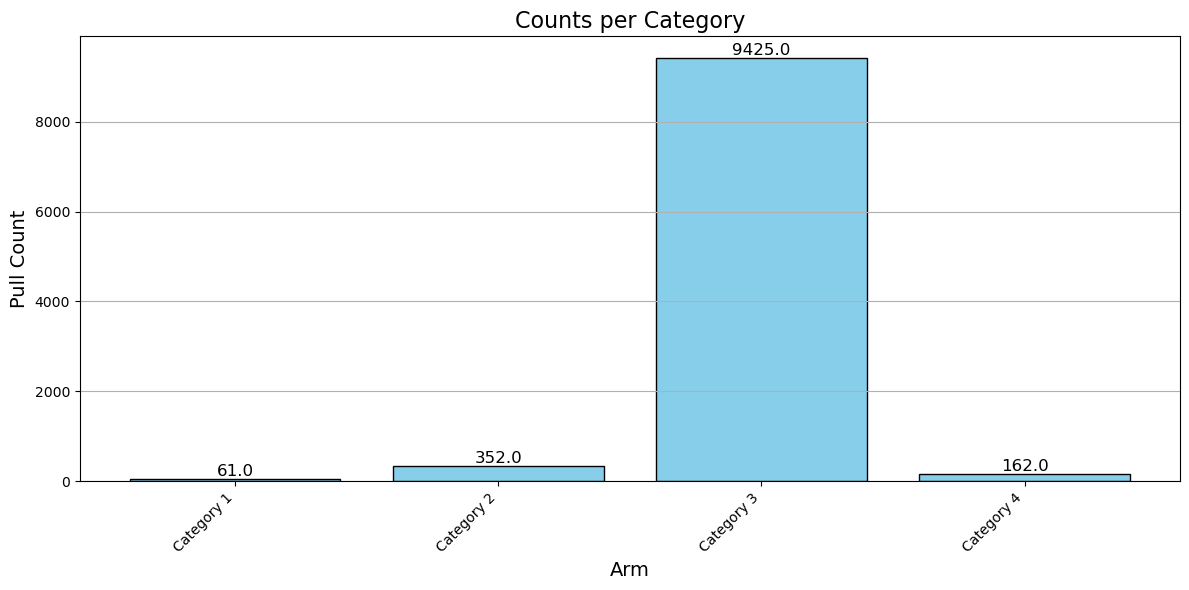

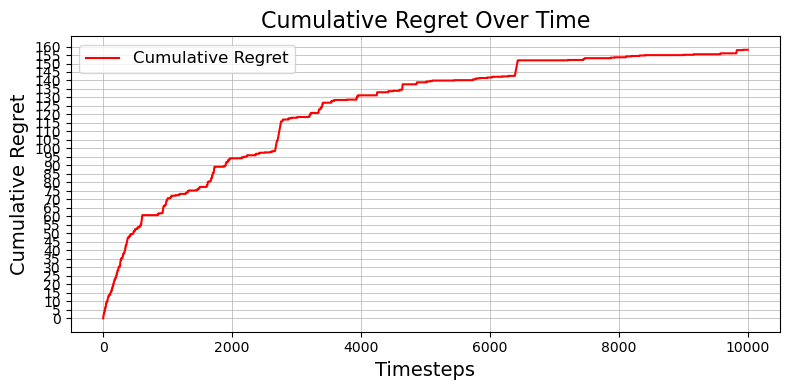

In [221]:
# Code to test
# Init Bandit
TIME_HORIZON = 10_000
bandit = MultiArmedBandit(np.array([0.23,0.55,0.76,0.44]))
agent = KLUCBAgent(TIME_HORIZON, bandit) ## Fill with correct constructor

# Loop
for i in range(TIME_HORIZON):
    agent.give_pull()

# Plot curves
agent.plot_reward_vs_time_curve()
agent.plot_arm_graph()
bandit.plot_cumulative_regret()

## Thompson Sampling

In [236]:
class ThompsonSamplingAgent(Agent):
    def __init__(self, time_horizon, bandit: MultiArmedBandit):  # Corrected __init__
        super().__init__(time_horizon, bandit)
        self.alpha = np.ones(len(bandit.arms))  # Success counts
        self.beta = np.ones(len(bandit.arms))  # Failure counts

    def give_pull(self):
        sampled_values = np.random.beta(self.alpha, self.beta)  # Sample from Beta distribution
        arm = np.argmax(sampled_values)  # Choose the arm with the highest sampled value
        reward = self.bandit.pull(arm)
        self.reinforce(reward, arm)

    def reinforce(self, reward, arm):
        if reward == 1:
            self.alpha[arm] += 1  # Update success count
        else:
            self.beta[arm] += 1  # Update failure count
        self.rewards.append(reward)

    def plot_arm_graph(self):
        counts = self.alpha + self.beta - 2  # Total number of times each arm was pulled
        indices = np.arange(len(counts))

        plt.figure(figsize=(12, 6))
        plt.bar(indices, counts, color='green', edgecolor='black')

        plt.title('Counts per Arm (Thompson Sampling Agent)', fontsize=16)
        plt.xlabel('Arm', fontsize=14)
        plt.ylabel('Pull Count', fontsize=14)
        plt.grid(axis='y', linestyle='-')
        plt.xticks(indices, [f'Arm {i+1}' for i in indices], rotation=45, ha='right')

        for i, count in enumerate(counts):
            plt.text(i, count + 0.5, str(int(count)), ha='center', va='bottom', fontsize=12, color='black')

        plt.tight_layout()
        plt.show()

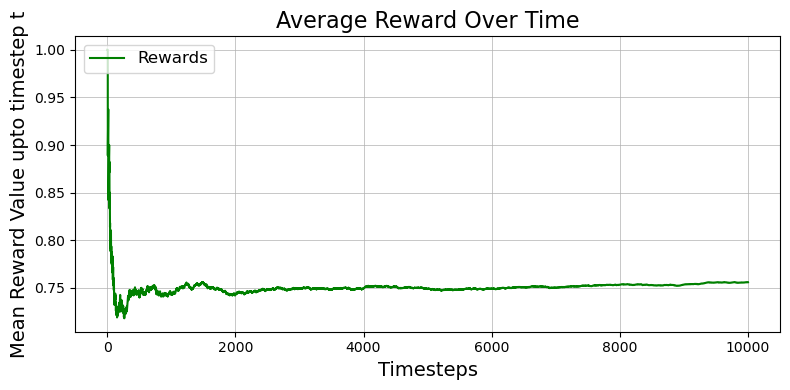

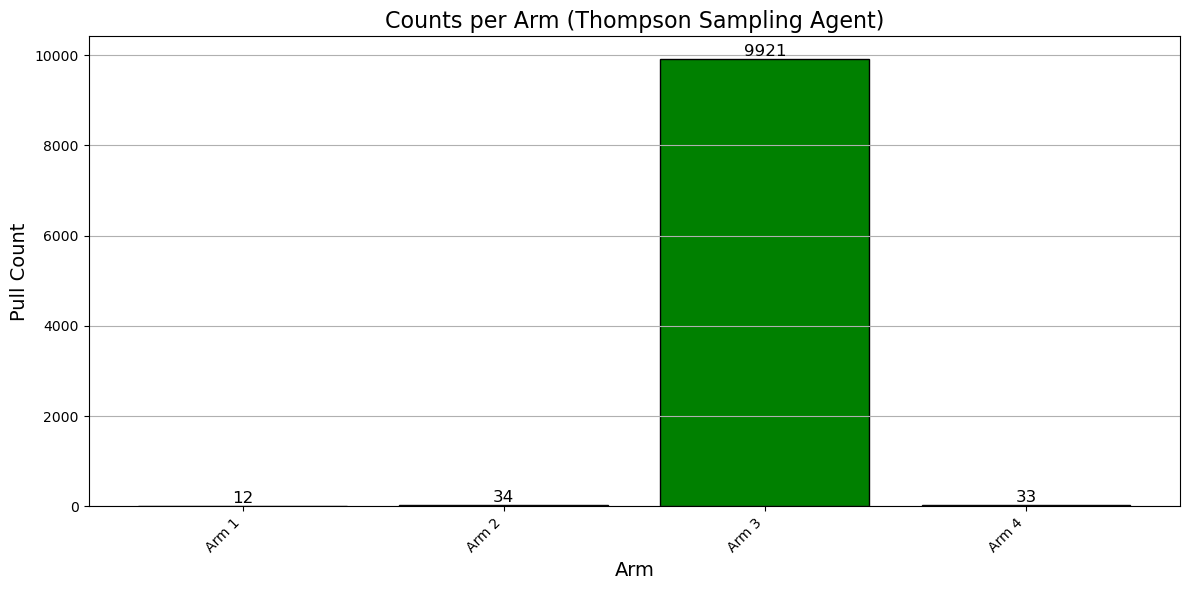

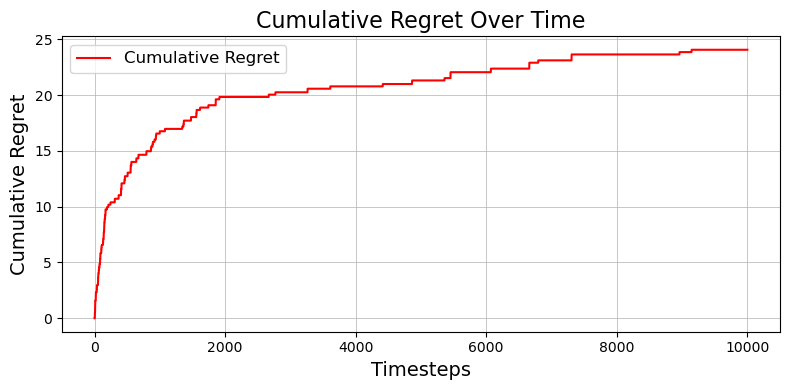

In [238]:
# Code to test
# Init Bandit
TIME_HORIZON = 10_000
bandit = MultiArmedBandit(np.array([0.23,0.55,0.76,0.44]))
agent =  ThompsonSamplingAgent(TIME_HORIZON, bandit)## Fill with correct constructor

# Loop
for i in range(TIME_HORIZON):
    agent.give_pull()

# Plot curves
agent.plot_reward_vs_time_curve()
agent.plot_arm_graph()
bandit.plot_cumulative_regret()

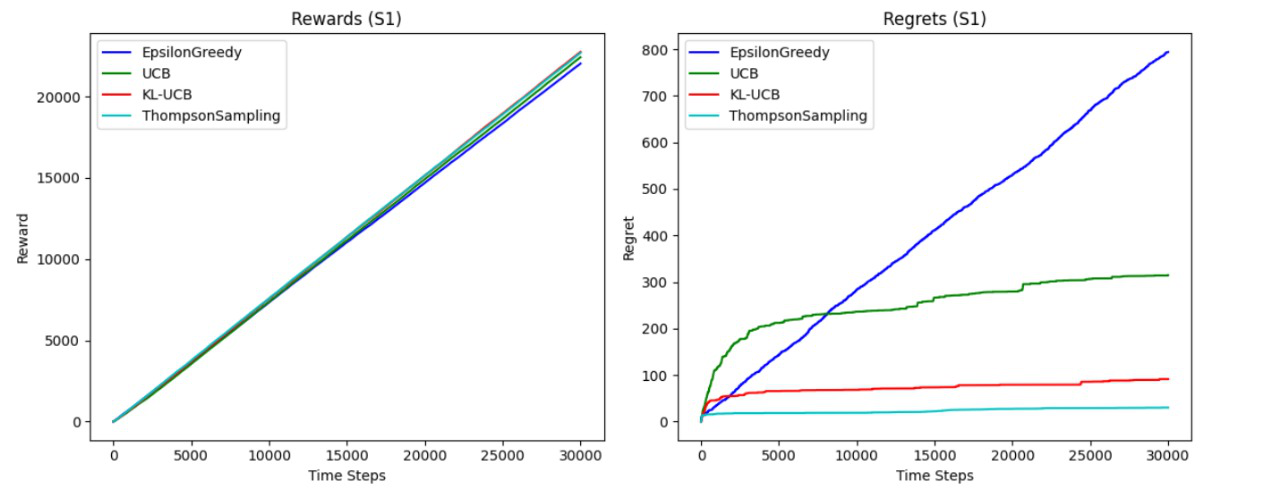

In [254]:

# Running S1 (Single Bandit)
TIME_HORIZON = 30_000
bandit = MultiArmedBandit(np.array([0.23, 0.55, 0.76, 0.44]))

agents = {
    "EpsilonGreedy": EpsilonGreedyAgent(TIME_HORIZON, bandit, epsilon=0.05),
    "UCB": UCBAgent(TIME_HORIZON, bandit),
    "KL-UCB": KLUCBAgent(TIME_HORIZON, bandit),
    "ThompsonSampling": ThompsonSamplingAgent(TIME_HORIZON, bandit),
}

for i in range(TIME_HORIZON):
    for agent in agents.values():
        agent.give_pull()

plt.figure(figsize=(12, 5))

# Rewards Plot (S1)
plt.subplot(1, 2, 1)
for name, agent in agents.items():
    plt.plot(np.cumsum(agent.rewards), label=name)
plt.xlabel("Time Steps")
plt.ylabel("Reward")
plt.title("Rewards (S1)")
plt.legend()

# Regret Plot (S1)
plt.subplot(1, 2, 2)
for name, agent in agents.items():
    plt.plot(np.cumsum(bandit.cumulative_regret_array[:TIME_HORIZON]), label=name)
plt.xlabel("Time Steps")
plt.ylabel("Regret")
plt.title("Regrets (S1)")
plt.legend()

plt.show()
    

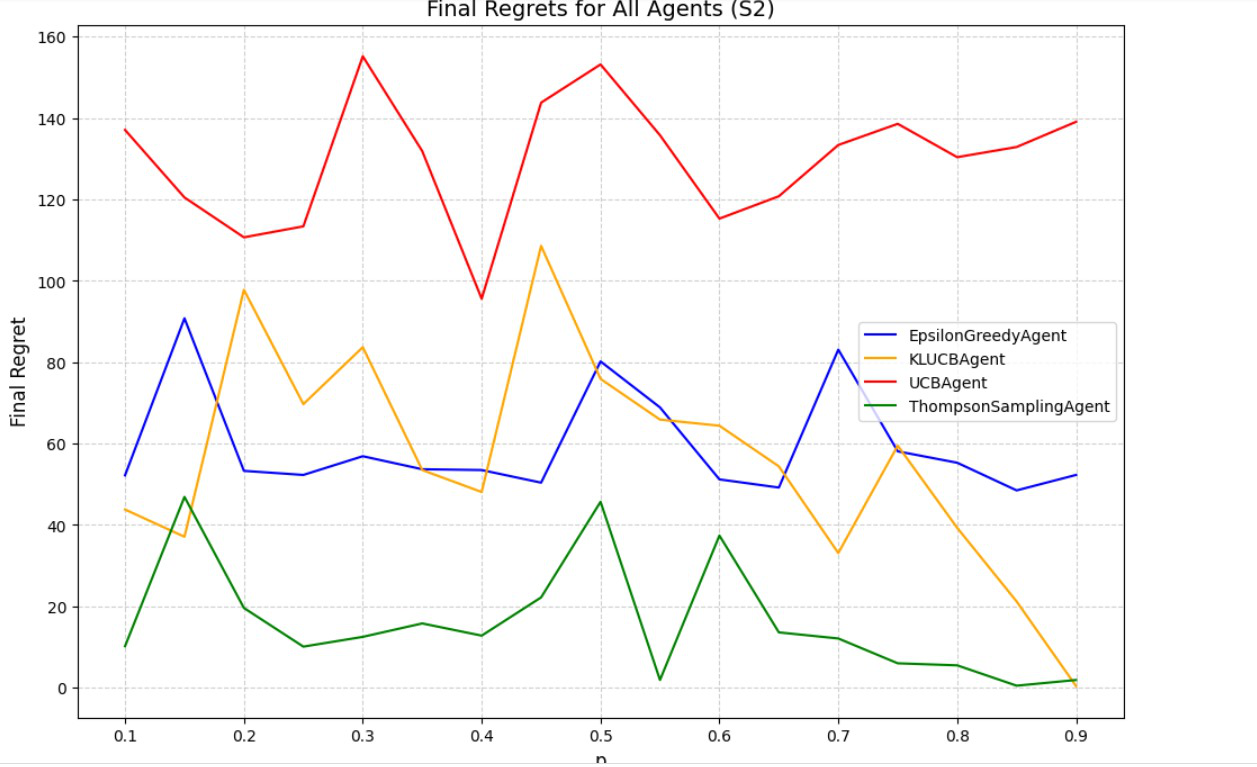

In [256]:

# Running S2 (Pairwise Bandits)
probabilities = np.arange(0.1, 1.0, 0.05)
final_regrets = {name: [] for name in agents.keys()}

for p in probabilities:
    bandit = MultiArmedBandit(np.array([p, p + 0.1]))

    for name, agent_class in agents.items():
        agent = agent_class.__class__(TIME_HORIZON, bandit)
        for _ in range(TIME_HORIZON):
            agent.give_pull()
        final_regrets[name].append(bandit.cumulative_regret_array[-1])

plt.figure(figsize=(8, 6))

for name, regrets in final_regrets.items():
    plt.plot(probabilities, regrets, label=name)

plt.xlabel("p")
plt.ylabel("Final Regret")
plt.title("Final Regrets for All Agents (S2)")
plt.legend()
plt.show()
    